# 1. Libraries and Data

Saving Book2.xlsx to Book2 (28).xlsx
Column names: Index(['Unnamed: 0', 'time', 'value', 'Unnamed: 3', 'date', 'Health'], dtype='object')
First few rows:
   Unnamed: 0       time       value  Unnamed: 3       date  Health
0         NaN 2007-07-01  188.362251         NaN 2004-01-01       9
1         NaN 2007-08-01  211.070833         NaN 2004-02-01       9
2         NaN 2007-09-01  194.546916         NaN 2004-03-01      12
3         NaN 2007-10-01  184.281476         NaN 2004-04-01      13
4         NaN 2007-11-01  219.769682         NaN 2004-05-01      10


Saving Book2.xlsx to Book2 (29).xlsx
Column names: Index(['Unnamed: 0', 'time', 'value', 'Unnamed: 3', 'date', 'Health'], dtype='object')
First few rows:
   Unnamed: 0       time       value  Unnamed: 3       date  Health
0         NaN 2007-07-01  188.362251         NaN 2004-01-01       9
1         NaN 2007-08-01  211.070833         NaN 2004-02-01       9
2         NaN 2007-09-01  194.546916         NaN 2004-03-01      12
3         NaN 2007-10-01  184.281476         NaN 2004-04-01      13
4         NaN 2007-11-01  219.769682         NaN 2004-05-01      10
DataFrame ready for analysis:
                   GDP  Health
date                          
2004-01-01  188.362251       9
2004-02-01  211.070833       9
2004-03-01  194.546916      12
2004-04-01  184.281476      13
2004-05-01  219.769682      10
Granger Causality Test:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=83.4034 , p=0.0000  , df_denom=167, df_num=1
ssr based chi2 test:   chi2=84.9017 , p=0.0000  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


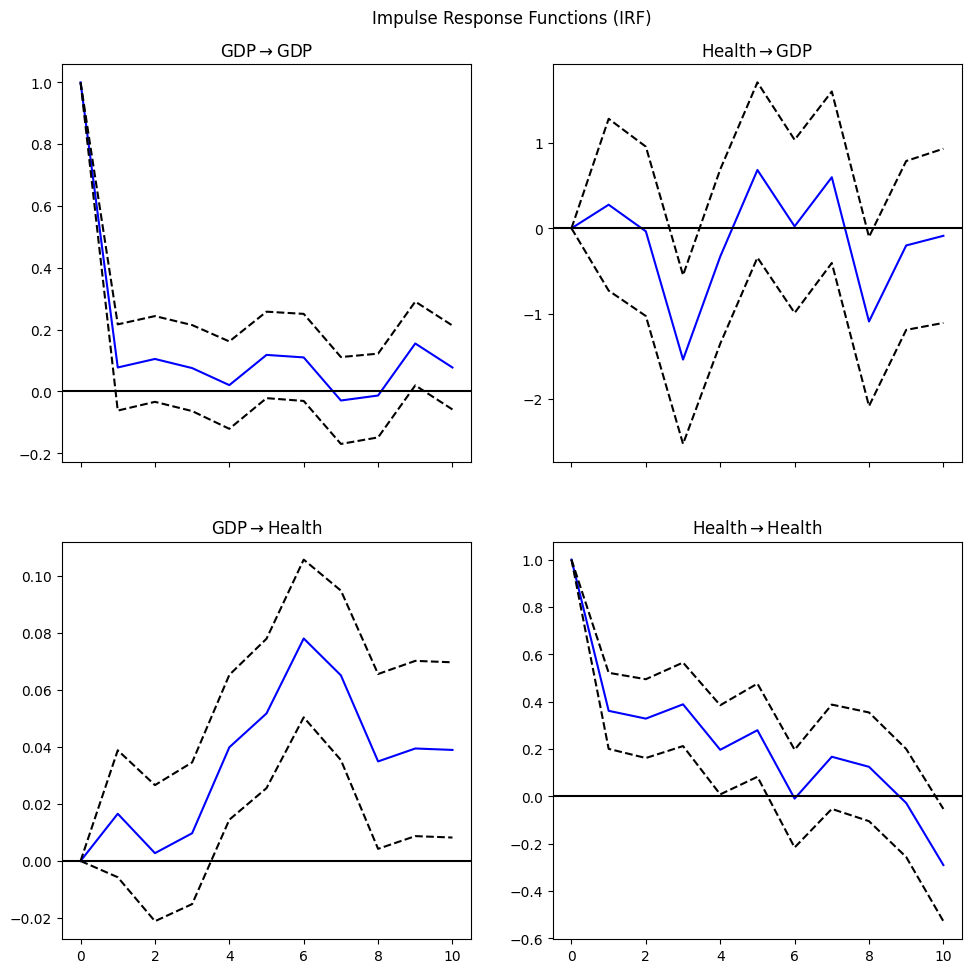

In [ ]:


# Load your data
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Book2 (1).xlsx')

# Check column names and the first few rows
print("Column names:", df.columns)
print("First few rows:")
print(df.head())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

# Load your data
from google.colab import files
uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Book2 (1).xlsx')

# Inspect columns and the first few rows
print("Column names:", df.columns)
print("First few rows:")
print(df.head())

# Clean and prepare data
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Rename columns if necessary
df.rename(columns={'value': 'GDP'}, inplace=True)

# Select relevant columns and drop missing values
df = df[['GDP', 'Health']].dropna()

# Verify the DataFrame structure
print("DataFrame ready for analysis:")
print(df.head())
# Granger Causality Test
def granger_causality_test(df, max_lag=12):
    print("Granger Causality Test:")
    granger_result = grangercausalitytests(df, maxlag=max_lag, verbose=True)
    return granger_result

# Perform Granger Causality Test
granger_result = granger_causality_test(df)
# Impulse Response Function (IRF)
def plot_irf(df, lags=12):
    model = VAR(df)
    results = model.fit(maxlags=lags, ic='aic')
    irf = results.irf(10)
    irf.plot(orth=False)
    plt.suptitle('Impulse Response Functions (IRF)')
    plt.show()

# Plot Impulse Response Function
plot_irf(df)
# Cross-Correlation Function (CCF)
def plot_ccf(df):
    from statsmodels.tsa.stattools import ccf
    lags = np.arange(-20, 21)  # You defined 41 lags here
    ccfs = ccf(df['GDP'], df['Health'], adjusted=False)[:len(lags)] # Calculate CCF and trim to match lag length

    plt.figure(figsize=(12, 6))
    plt.stem(lags, ccfs, use_line_collection=True)
    plt.xlabel('Lag')
    plt.ylabel('Cross-Correlation')
    plt.title('Cross-Correlation Function (CCF) between GDP and Health')
    plt.grid(True)
    plt.show()





Saving GDP and (jobs and education).xlsx to GDP and (jobs and education) (4).xlsx
Granger Causality Test:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0320  , p=0.8582  , df_denom=167, df_num=1
ssr based chi2 test:   chi2=0.0326  , p=0.8568  , df=1
likelihood ratio test: chi2=0.0326  , p=0.8568  , df=1
parameter F test:         F=0.0320  , p=0.8582  , df_denom=167, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2805  , p=0.7558  , df_denom=164, df_num=2
ssr based chi2 test:   chi2=0.5781  , p=0.7490  , df=2
likelihood ratio test: chi2=0.5771  , p=0.7494  , df=2
parameter F test:         F=0.2805  , p=0.7558  , df_denom=164, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8327  , p=0.0401  , df_denom=161, df_num=3
ssr based chi2 test:   chi2=8.8674  , p=0.0311  , df=3
likelihood ratio test: chi2=8.6413  , p=0.0345  , df=3
parameter F test:         F=2.8327  , p=0.0401  , df_denom=16

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


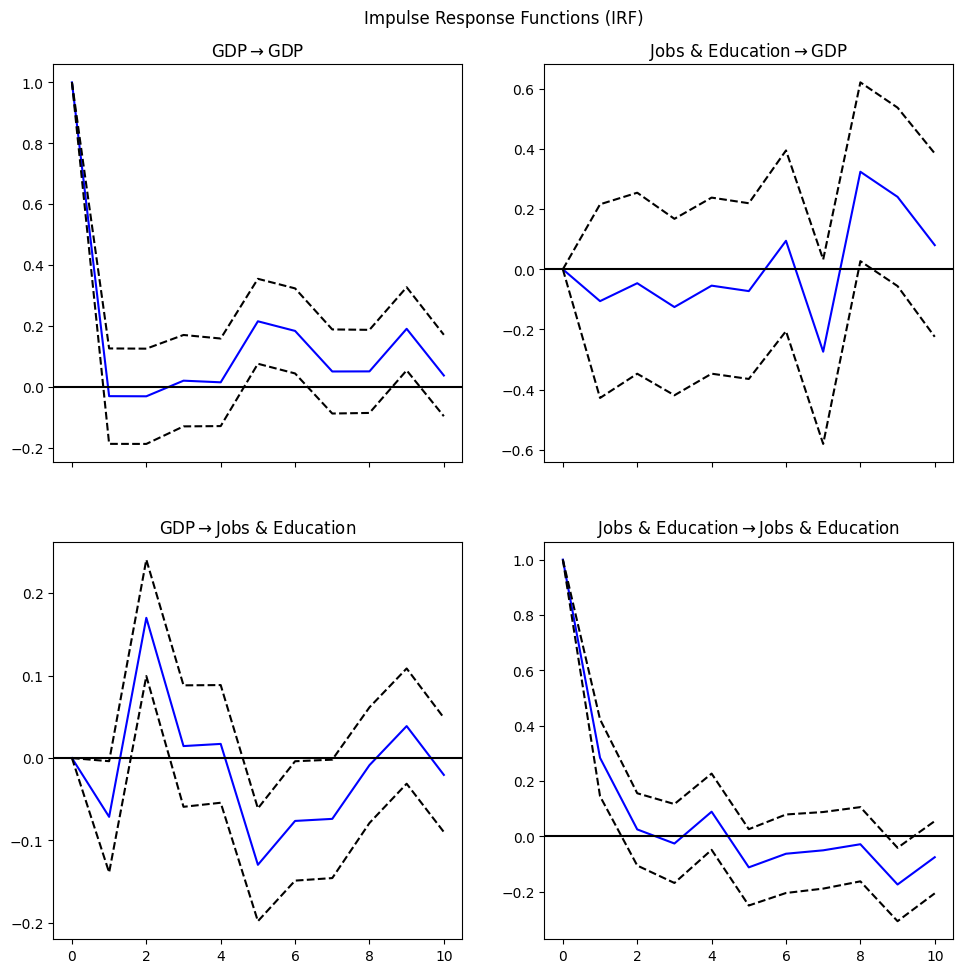

<ipython-input-26-450f0d3d7bd1>:56: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, ccfs, use_line_collection=True)


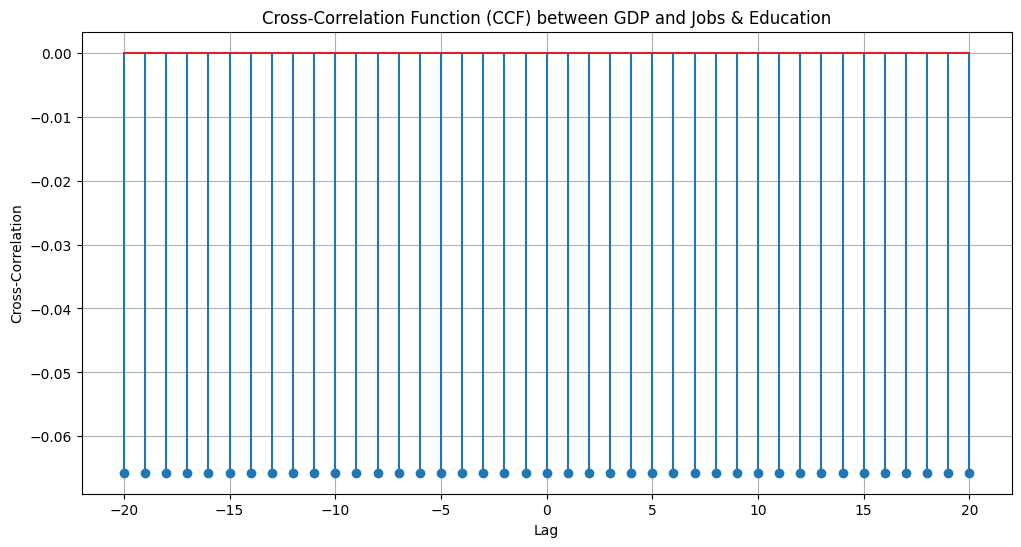

In [ ]:
!pip install --upgrade statsmodels

# Load your data
from google.colab import files
import pandas as pd # Import pandas for data manipulation
import numpy as np # Import numpy for numerical operations
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, ccf # Import grangercausalitytests from the correct module
import matplotlib.pyplot as plt

uploaded = files.upload()  # Make sure to run this cell and upload your file

# Get the correct filename from the uploaded dictionary
filename = list(uploaded.keys())[0]  # Assuming you uploaded only one file

# Read the file using the correct filename
df = pd.read_excel(filename)

# ... rest of your code ...

# Prepare the data
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[['GDP', 'Jobs & Education']].dropna()

# Granger Causality Test
def granger_causality_test(df, max_lag=12):
    print("Granger Causality Test:")
    granger_result = grangercausalitytests(df, maxlag=max_lag, verbose=True)
    return granger_result

# Perform Granger Causality Test
granger_result = granger_causality_test(df)

# Impulse Response Function (IRF)
def plot_irf(df, lags=12):
    model = VAR(df)
    results = model.fit(maxlags=lags, ic='aic')
    irf = results.irf(10)
    irf.plot(orth=False)
    plt.suptitle('Impulse Response Functions (IRF)')
    plt.show()

# Plot Impulse Response Function
plot_irf(df)

# Cross-Correlation Function (CCF)
def plot_ccf(df):
    lags = np.arange(-20, 21)
    ccfs = []
    for lag in lags:
        ccf_value = ccf(df['GDP'], df['Jobs & Education'], lag)[0] # Extract the first value (for the specified lag)
        ccfs.append(ccf_value)

    plt.figure(figsize=(12, 6))
    plt.stem(lags, ccfs, use_line_collection=True)
    plt.xlabel('Lag')
    plt.ylabel('Cross-Correlation')
    plt.title('Cross-Correlation Function (CCF) between GDP and Jobs & Education')
    plt.grid(True)
    plt.show()

# Plot Cross-Correlation Function
plot_ccf(df)

Saving gdp and (food and drinks ).xlsx to gdp and (food and drinks ) (18).xlsx
        date  Food & Drink  Unnamed: 2  Unnamed: 3       time         GDP
0 2004-01-01             7         NaN         NaN 2007-07-01  188.362251
1 2004-02-01             7         NaN         NaN 2007-08-01  211.070833
2 2004-03-01             7         NaN         NaN 2007-09-01  194.546916
3 2004-04-01             8         NaN         NaN 2007-10-01  184.281476
4 2004-05-01             8         NaN         NaN 2007-11-01  219.769682
Index(['date', 'Food & Drink', 'Unnamed: 2', 'Unnamed: 3', 'time', 'GDP'], dtype='object')
Food & Drink      0
Unnamed: 2      214
Unnamed: 3      214
time             43
GDP              43
dtype: int64

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8649 , p=0.0007  , df_denom=210, df_num=1
ssr based chi2 test:   chi2=12.0344 , p=0.0005  , df=1
likelihood ratio test: chi2=11.7068 , p=0.0006  , df=1
parameter F test:         F=11.8649 , p=0.00

<ipython-input-19-3adcc045afa6>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-19-3adcc045afa6>:50: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(-12, 13), ccf_values[:25], use_line_collection=True)


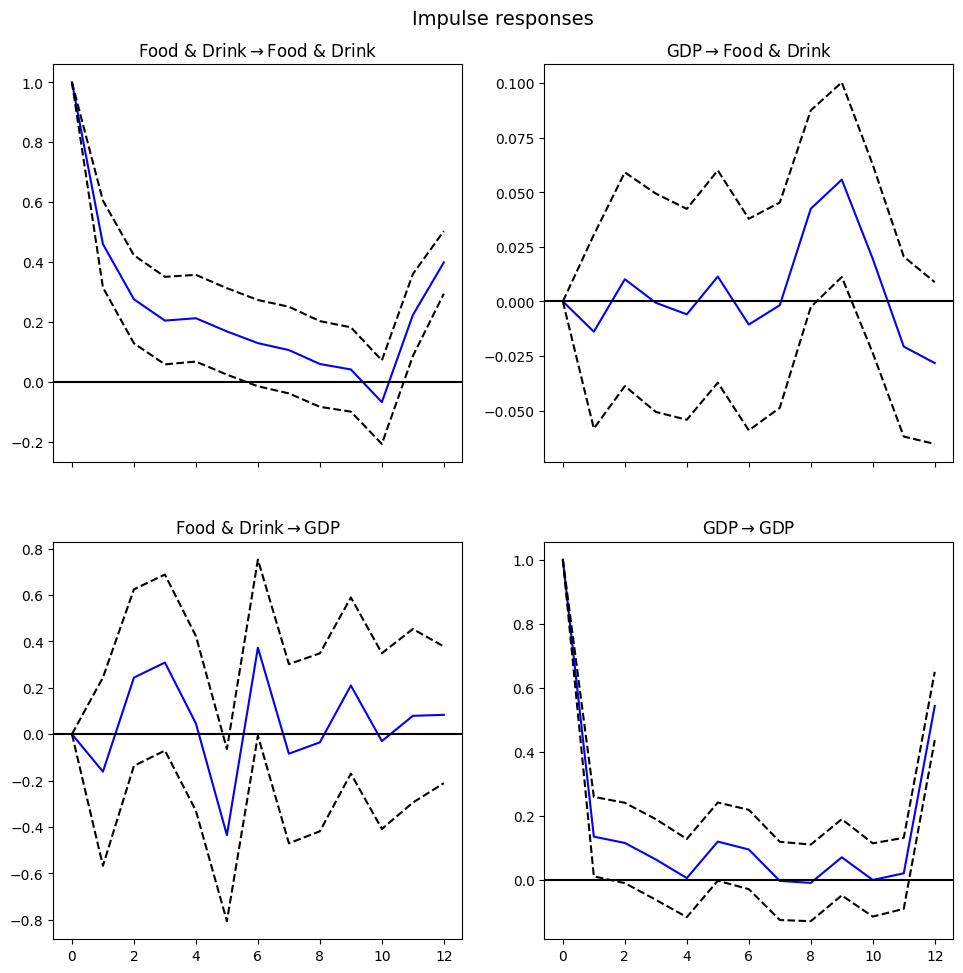

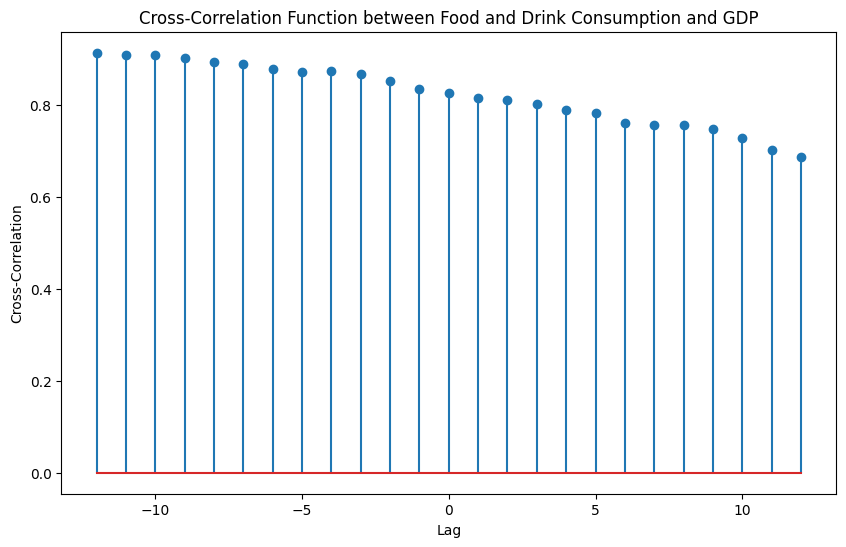

In [ ]:
from google.colab import files
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Upload and load the file
uploaded = files.upload()

# Load the Excel file
df = pd.read_excel(next(iter(uploaded.keys())))

# Display the first few rows to verify
print(df.head())

# Check the columns in the DataFrame
print(df.columns)

# Ensure the 'date' column is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Investigate missing values before dropping
print(df.isnull().sum()) # Check number of missing values in each column

# Consider filling missing values instead of dropping all rows
# Example using forward fill:
df_filled = df.fillna(method='ffill')

# Adjust column names if needed (replace with actual column names)
df_granger = df_filled[['Food & Drink', 'GDP']]  # Ensure these columns exist

# Perform the Granger Causality Test, adjusting maxlag if needed
granger_result = grangercausalitytests(df_granger, maxlag=2, verbose=True) # Lower maxlag
from statsmodels.tsa.api import VAR

# Fit a VAR model
model = VAR(df_granger)
var_results = model.fit(maxlags=12)

# Generate Impulse Response Functions
irf = var_results.irf(12)
irf.plot(orth=False)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import ccf

# Compute Cross-Correlation Function
ccf_values = ccf(df_granger['Food & Drink'], df_granger['GDP'])

# Plot CCF
plt.figure(figsize=(10, 6))
plt.stem(range(-12, 13), ccf_values[:25], use_line_collection=True)
plt.title('Cross-Correlation Function between Food and Drink Consumption and GDP')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()


### 1.1 Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

!pip install pytrends
from pytrends.request import TrendReq

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### 1.2 Reading in Data

In [ ]:
df_gdp = pd.read_csv('/content/Monthy_GDP_MI.csv')
df_trends = pd.read_csv('/content/monthly_main_category.csv')

## 1.3 Scraping Google Trends Data

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ["أسعار الذهب", "سوق السيارات", "قرض"]
pytrends.build_payload(keywords, cat=0, timeframe='2007-01-01 2021-09-01', geo='EG', gprop='')
scraped_trends = pytrends.interest_over_time()
scraped_trends.tail()

,أسعار الذهب,سوق السيارات,قرض,isPartial
date,,,,
2021-05-01,32,8,35,False
2021-06-01,34,8,39,False
2021-07-01,26,6,37,False
2021-08-01,25,7,41,False
2021-09-01,24,7,39,False


# 2. Cleaning

In [ ]:
# cleaning scraped trends data
scraped_trends = scraped_trends.reset_index()
scraped_trends['date'] = pd.to_datetime(scraped_trends['date'],format='mixed', yearfirst=True)
scraped_trends = scraped_trends.iloc[:,:4]

In [ ]:
scraped_trends.head()

,date,أسعار الذهب,سوق السيارات,قرض
0,2007-01-01,5,31,0
1,2007-02-01,0,37,0
2,2007-03-01,9,33,0
3,2007-04-01,6,38,0
4,2007-05-01,6,42,4


In [ ]:
# prepare for merge
for i in (df_gdp['time'], df_trends['date']):
    i = pd.to_datetime(i, format='mixed', yearfirst=True)
df_gdp.rename(columns={'time':'date'}, inplace=True)

# merge
merged = df_gdp.merge(df_trends, how='left', on='date')
merged['date'] = pd.to_datetime(merged['date'],format='mixed', yearfirst=True)
merged = merged.merge(scraped_trends, how='left', on='date')
merged.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
merged.rename(columns={'value':'gdp',
                      'أسعار الذهب':'Gold Prices Search',
                      'قرض':'Loan',
                      'سوق السيارات':'Car Market'}, inplace=True)
merged['day'] = merged['date'].dt.day
merged['month'] = merged['date'].dt.month
merged['year'] = merged['date'].dt.year

In [ ]:
# train-test split
train_size = int(len(merged)*(70/100))  # 70-30 split
train = merged.iloc[:train_size,:]
test = merged.iloc[train_size:,:]

X_train = train.drop(columns=['date', 'gdp'])
y_train = train.gdp

X_test = test.drop(columns=['date', 'gdp'])
y_test = test.gdp

# 3. Time-Lagging Analysis

In [ ]:
df_gdp['time'] = pd.to_datetime(df_gdp['date'])
df_trends['date'] = pd.to_datetime(df_trends['date'])

# Merge datasets on the date
merged_data = pd.merge(df_gdp, df_trends, left_on='time', right_on='date')

# Drop unnecessary columns
#merged_data = merged_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'date'])

# Create lagged variables (1 to 12 months)
lags = range(1, 13)
for lag in lags:
    for column in df_trends.columns[2:]:
        merged_data[f'{column}_lag_{lag}'] = merged_data[column].shift(lag)

# Drop rows with missing values
merged_data_cleaned = merged_data.dropna()

# Perform correlation analysis between GDP and lagged categories
correlation_results = {}
for column in merged_data_cleaned.columns[3:]:
    correlation_results[column] = merged_data_cleaned['value'].corr(merged_data_cleaned[column])

# Sort and display the strongest correlations
sorted_correlation_results = pd.Series(correlation_results).sort_values(ascending=False)
print(sorted_correlation_results)

Health_lag_12                     0.93
Health                            0.92
Reference_lag_12                  0.92
Reference                         0.92
Unnamed: 0_y                      0.91
                                  ... 
Computers & Electronics_lag_10   -0.75
Games                            -0.75
Computers & Electronics_lag_4    -0.76
Computers & Electronics_lag_5    -0.76
Computers & Electronics_lag_6    -0.76
Length: 328, dtype: float64


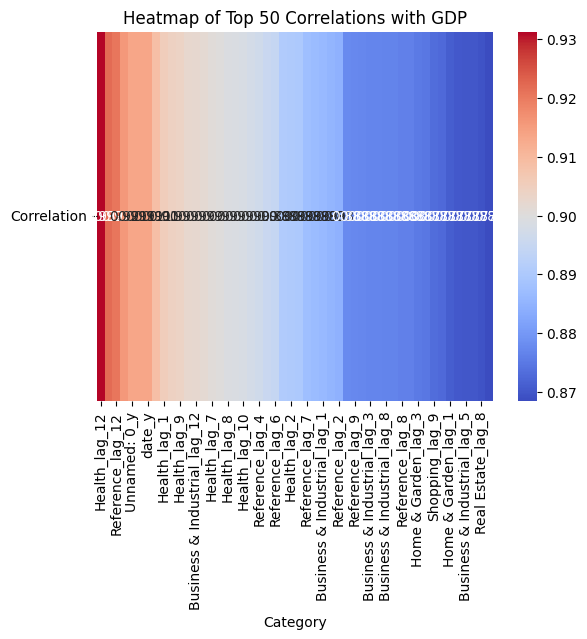

In [ ]:
correlation_df = sorted_correlation_results.reset_index()
correlation_df.columns = ['Category', 'Correlation']

# 1. Heatmap of Correlations (top 50 categories for clarity)

sns.heatmap(correlation_df.head(50).set_index('Category').T, cmap='coolwarm', annot=True, cbar=True)
plt.title('Heatmap of Top 50 Correlations with GDP')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

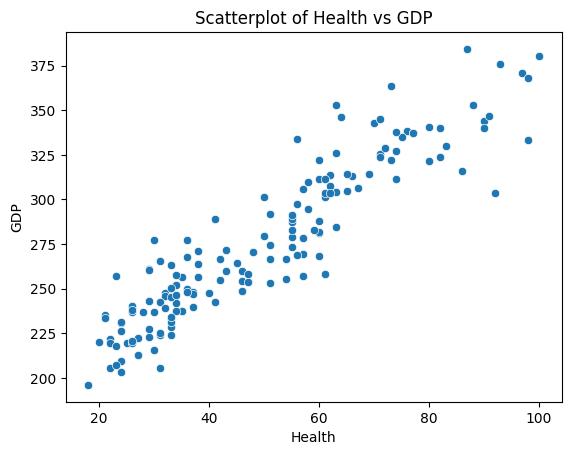

In [ ]:
sns.scatterplot(x=merged_data_cleaned['Health'], y=merged_data_cleaned['value'])
plt.title('Scatterplot of Health vs GDP')
plt.xlabel('Health')
plt.ylabel('GDP')
plt.show()

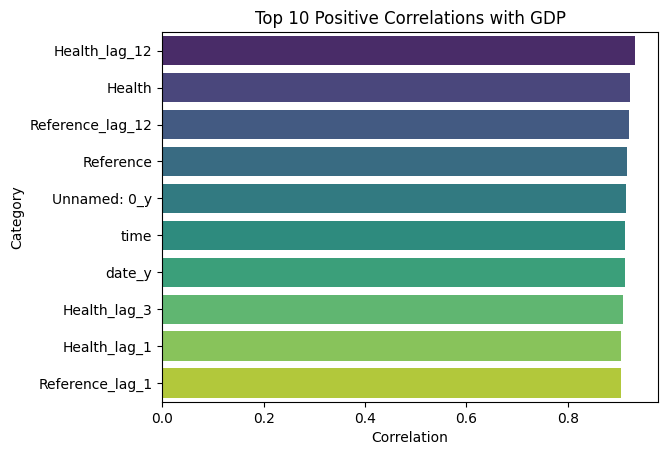

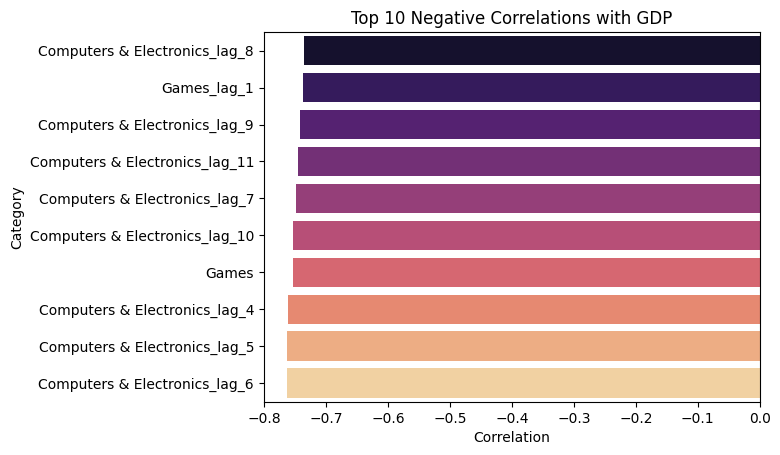

In [ ]:
positive_correlations = correlation_df[correlation_df['Correlation'] > 0].head(10)
negative_correlations = correlation_df[correlation_df['Correlation'] < 0].tail(10)

# Bar Plot for Top Positive Correlations
sns.barplot(x='Correlation', y='Category', data=positive_correlations, palette='viridis')
plt.title('Top 10 Positive Correlations with GDP')
plt.xlabel('Correlation')
plt.ylabel('Category')
plt.show()

# Bar Plot for Top Negative Correlations
sns.barplot(x='Correlation', y='Category', data=negative_correlations, palette='magma')
plt.title('Top 10 Negative Correlations with GDP')
plt.xlabel('Correlation')
plt.ylabel('Category')
plt.show()

# 4. EDA

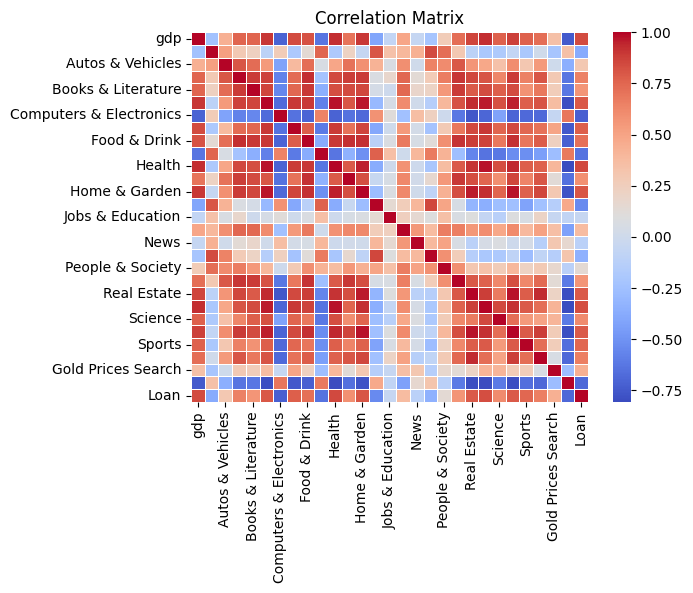

In [ ]:
# correlation matrix
corr = merged.drop(columns=['date', 'day', 'month', 'year']).corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix');

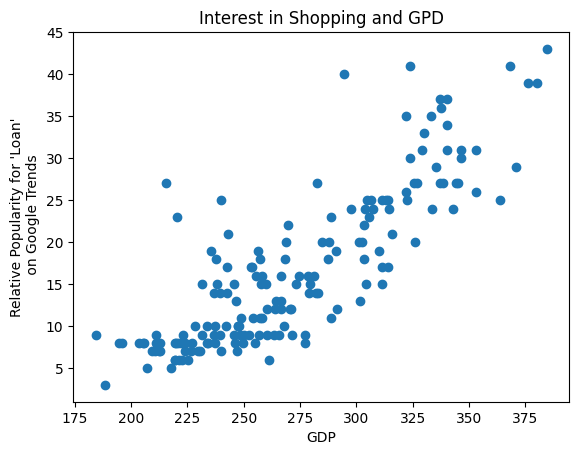

In [ ]:
plt.scatter(merged['gdp'], merged['Loan'])
plt.xlabel('GDP')
plt.ylabel("Relative Popularity for 'Loan'\n on Google Trends")
plt.title('Interest in Shopping and GPD');

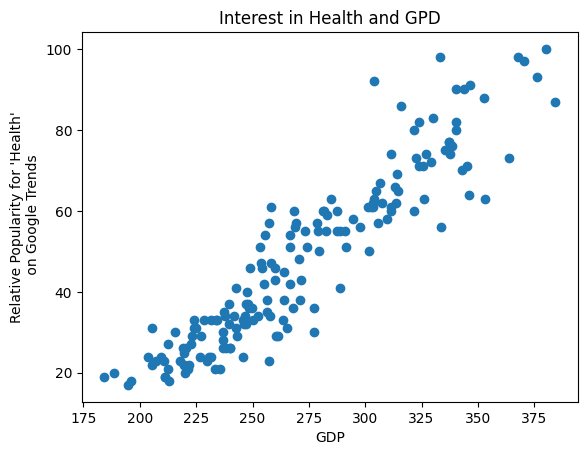

In [ ]:
plt.scatter(merged['gdp'], merged['Health'])
plt.xlabel('GDP')
plt.ylabel("Relative Popularity for 'Health'\n on Google Trends")
plt.title('Interest in Health and GPD');

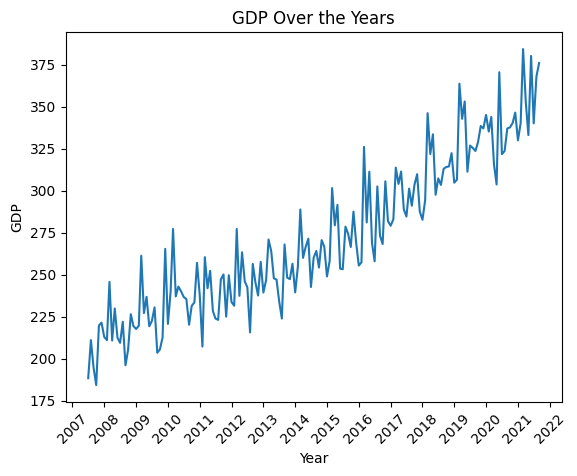

In [ ]:
plt.plot(merged['date'], merged['gdp'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over the Years');

# 3. Feature Selection

### 3.1 Lasso

In [ ]:
# Time Series CV for Lasso
alpha_range = np.logspace(-4, 2, 50)
tscv = TimeSeriesSplit(n_splits=5)
lasso = Lasso(random_state=515)

param_grid = {'alpha': alpha_range}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X, y)

best_alpha = int(grid_search_lasso.best_params_['alpha'])
print(f"Best alpha: {best_alpha}")

NameError: name 'X' is not defined

In [ ]:
# Lasso estimation
lasso = Lasso(alpha=best_alpha, random_state=515)
lasso.fit(X,y)
lasso.coef_

array([ 0.        ,  0.06272249,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.10309659,  0.        , -0.        ,  0.67139538,
        0.        ,  0.67968045, -0.        , -0.06009568, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.26584213,  0.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
# Lasso features
lasso_features = pd.DataFrame({
    'feature': X.columns,
    'coef': np.abs(lasso.coef_)
})

lasso_features = lasso_features[lasso_features['coef']!=0]
lasso_features

,feature,coef
1,Autos & Vehicles,0.06
6,Finance,0.10
9,Health,0.67
11,Home & Garden,0.68
13,Jobs & Education,0.06
21,Science,0.27


### 3.2 RF Feature Importance

In [ ]:
# Time Series CV for RF
rf = RandomForestRegressor(random_state=515)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
grid_search_rf.fit(X, y)

grid_search_rf.best_params_

Best Parameters: {'alpha': 32.3745754281764}


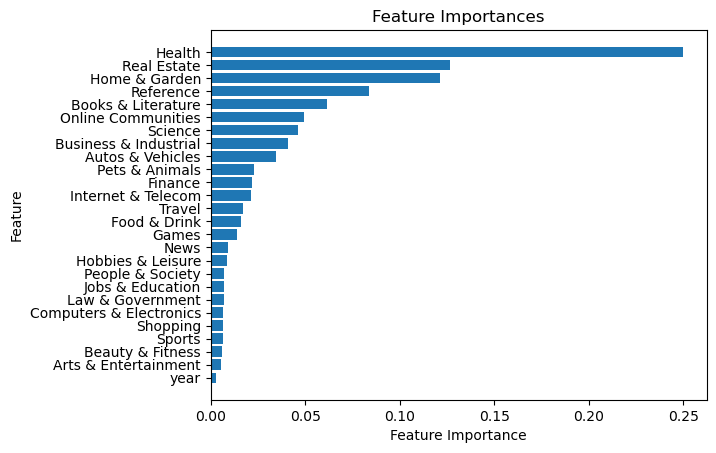

In [ ]:
# Feature importance for best estimator
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X,y)

importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for easier sorting
feature_importance_merged = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance_merged = feature_importance_merged.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_merged['Feature'], feature_importance_merged['Importance'], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

### 3.3 Correlation-based Feature Selection

In [ ]:
# drop uncorrelated variables (threshold abs(0.3))
corr.iloc[0]

gdp                        1.00
Arts & Entertainment      -0.24
Autos & Vehicles           0.44
Beauty & Fitness           0.76
Books & Literature         0.76
Business & Industrial      0.90
Computers & Electronics   -0.71
Finance                    0.84
Food & Drink               0.82
Games                     -0.63
Health                     0.93
Hobbies & Leisure          0.70
Home & Garden              0.90
Internet & Telecom        -0.41
Jobs & Education          -0.07
Law & Government           0.49
News                      -0.05
Online Communities        -0.22
People & Society           0.27
Pets & Animals             0.72
Real Estate                0.86
Reference                  0.92
Science                    0.77
Shopping                   0.87
Sports                     0.77
Travel                     0.72
Name: gdp, dtype: float64